# Reproducibility Check: Compare French et al. 2012 to Current Data
- Use the same 25 F ring observations used in 2012
- Compare the EWs
- Primary differences in methodology:
  - 2012 used CISSCAL 3.3 through ISS_041RF_FMOVIE001_VIMS and CISSCAL 3.6 after, while we now use CISSCAL 4.0
  - 2012 used radial extents from 138,465-141,835 while we now use 139,223-141,223
 

# Read Data and Initialize Data Structures

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..')
from f_ring_util import compute_corrected_ew

In [2]:
# Read the new data and populate the old data
obsdata = pd.read_csv('../data_files/good_qual_full.csv', parse_dates=['Date'], index_col='Observation')
time0 = np.datetime64('1970-01-01T00:00:00')
obsdata['Date_days'] = (obsdata['Date']-time0).dt.total_seconds()/86400
olddata_dict = {
    'ISS_000RI_SATSRCHAP001_PRIME': [ 2.6, 0.8],
    'ISS_00ARI_SPKMOVPER001_PRIME': [ 3.1, 0.6],
    'ISS_006RI_LPHRLFMOV001_PRIME': [ 4.7, 0.9],
    'ISS_007RI_LPHRLFMOV001_PRIME': [ 1.5, 0.3],
    'ISS_029RF_FMOVIE001_VIMS':     [12.6, 2.7],
    'ISS_031RF_FMOVIE001_VIMS':     [10.3, 1.4],
    'ISS_032RF_FMOVIE001_VIMS':     [ 9.9, 1.8],
    'ISS_033RF_FMOVIE001_VIMS':     [12.9, 1.7],
    'ISS_036RF_FMOVIE001_VIMS':     [13.6, 5.3],
    'ISS_036RF_FMOVIE002_VIMS':     [ 2.9, 2.2],
    'ISS_039RF_FMOVIE002_VIMS':     [ 2.7, 1.7],
    'ISS_039RF_FMOVIE001_VIMS':     [ 1.7, 1.0],
    'ISS_041RF_FMOVIE002_VIMS':     [ 1.8, 1.0],
    'ISS_041RF_FMOVIE001_VIMS':     [ 2.1, 0.9],
    'ISS_044RF_FMOVIE001_VIMS':     [ 2.4, 0.9],
    'ISS_051RI_LPMRDFMOV001_PRIME': [ 8.1, 1.6],
    'ISS_055RF_FMOVIE001_VIMS':     [ 1.3, 0.3],
    'ISS_055RI_LPMRDFMOV001_PRIME': [ 3.2, 0.5],
    'ISS_057RF_FMOVIE001_VIMS':     [ 1.3, 0.3],
    'ISS_068RF_FMOVIE001_VIMS':     [ 0.9, 0.1],
    'ISS_075RF_FMOVIE002_VIMS':     [ 1.2, 0.2],
    'ISS_083RI_FMOVIE109_VIMS':     [ 1.9, 0.6],
    'ISS_087RF_FMOVIE003_PRIME':    [ 0.9, 0.2],
    'ISS_089RF_FMOVIE003_PRIME':    [ 1.0, 0.2],
    'ISS_100RF_FMOVIE003_PRIME':    [ 0.8, 0.1]
}
olddata_obsname = olddata_dict.keys() 
olddata_ew = [x[0] for x in olddata_dict.values()]
olddata_std = [x[1] for x in olddata_dict.values()]
olddata = pd.DataFrame({'EW':          olddata_ew, 
                        'EW Std':      olddata_std},
                       index=olddata_obsname)
# Find the intersection of the old and new data
# This should be the same number of observations as the old data
commondata = obsdata.join(olddata, on='Observation', how='inner', rsuffix='_old')
commondata['EW Ratio'] = commondata['EW']/commondata['EW_old']
commondata['Normal EW_old'] = commondata['EW_old'] * np.abs(
        np.cos(np.radians(commondata['Mean Emission'])))
print('Total number of new observation names:', len(obsdata))
print('Total number of observation names from 2012:', len(olddata))
print('Number of observation names in common:', len(commondata))

Total number of new observation names: 151
Total number of observation names from 2012: 25
Number of observation names in common: 25


In [3]:
# These are the images used to compare calibrations. Each is either the first or last
# image used in the 2012 paper for each observation name.
# image_versions = (
#     ('N1466448701_1_CALIB-3.3.IMG', 'N1466448701_1_CALIB-4.0.IMG'), # ISS_000RI_SATSRCHAP001_PRIME
#     ('N1479201492_1_CALIB-3.3.IMG', 'N1479201492_1_CALIB-4.0.IMG'), # ISS_00ARI_SPKMOVPER001_PRIME
#     ('N1492052646_1_CALIB-3.3.IMG', 'N1492052646_1_CALIB-4.0.IMG'), # ISS_006RI_LPHRLFMOV001_PRIME
#     ('N1493613276_1_CALIB-3.3.IMG', 'N1493613276_1_CALIB-4.0.IMG'), # ISS_007RI_LPHRLFMOV001_PRIME
#     ('N1538168640_1_CALIB-3.3.IMG', 'N1538168640_1_CALIB-4.0.IMG'), # ISS_029RF_FMOVIE001_VIMS
#     ('N1541012989_1_CALIB-3.3.IMG', 'N1541012989_1_CALIB-4.0.IMG'), # ISS_031RF_FMOVIE001_VIMS
#     ('N1542047155_1_CALIB-3.3.IMG', 'N1542047155_1_CALIB-4.0.IMG'), # ISS_032RF_FMOVIE001_VIMS
#     ('N1543166702_1_CALIB-3.3.IMG', 'N1543166702_1_CALIB-4.0.IMG'), # ISS_033RF_FMOVIE001_VIMS
#     ('N1545556618_1_CALIB-3.3.IMG', 'N1545556618_1_CALIB-4.0.IMG'), # ISS_036RF_FMOVIE001_VIMS
#     ('N1546748805_1_CALIB-3.3.IMG', 'N1546748805_1_CALIB-4.0.IMG'), # ISS_036RF_FMOVIE002_VIMS
#     ('N1549801218_1_CALIB-3.3.IMG', 'N1549801218_1_CALIB-4.0.IMG'), # ISS_039RF_FMOVIE002_VIMS
#     ('N1551253524_1_CALIB-3.3.IMG', 'N1551253524_1_CALIB-4.0.IMG'), # ISS_039RF_FMOVIE001_VIMS
#     ('N1552790437_1_CALIB-3.3.IMG', 'N1552790437_1_CALIB-4.0.IMG'), # ISS_041RF_FMOVIE002_VIMS
#     ('N1554026927_1_CALIB-3.3.IMG', 'N1554026927_1_CALIB-4.0.IMG'), # ISS_041RF_FMOVIE001_VIMS

#     ('N1557020880_1_CALIB-3.6.IMG', 'N1557020880_1_CALIB-4.0.IMG'), # ISS_044RF_FMOVIE001_VIMS
#     ('N1571435192_1_CALIB-3.6.IMG', 'N1571435192_1_CALIB-4.0.IMG'), # ISS_051RI_LPMRDFMOV001_PRIME
#     ('N1577809417_1_CALIB-3.6.IMG', 'N1577809417_1_CALIB-4.0.IMG'), # ISS_055RF_FMOVIE001_VIMS
#     ('N1578386361_1_CALIB-3.6.IMG', 'N1578386361_1_CALIB-4.0.IMG'), # ISS_055RI_LPMRDFMOV001_PRIME
#     ('N1579790806_1_CALIB-3.6.IMG', 'N1579790806_1_CALIB-4.0.IMG'), # ISS_057RF_FMOVIE001_VIMS
#     ('N1589589182_1_CALIB-3.6.IMG', 'N1589589182_1_CALIB-4.0.IMG'), # ISS_068RF_FMOVIE001_VIMS
#     ('N1593913221_1_CALIB-3.6.IMG', 'N1593913221_1_CALIB-4.0.IMG'), # ISS_075RF_FMOVIE002_VIMS
#     ('N1598806665_1_CALIB-3.6.IMG', 'N1598806665_1_CALIB-4.0.IMG'), # ISS_083RI_FMOVIE109_VIMS
#     ('N1601485634_1_CALIB-3.6.IMG', 'N1601485634_1_CALIB-4.0.IMG'), # ISS_087RF_FMOVIE003_PRIME
#     ('N1602717403_1_CALIB-3.6.IMG', 'N1602717403_1_CALIB-4.0.IMG'), # ISS_089RF_FMOVIE003_PRIME
#     ('N1610364098_1_CALIB-3.6.IMG', 'N1610364098_1_CALIB-4.0.IMG'), # ISS_100RF_FMOVIE003_PRIME
# )

# The ratio of the medians of new / old. The medians are computed using only the pixel values with
# ring radii 139820-140620, to cover the range of +/- 400km from the nominal core semi-major axis
# (a*e = 329 km)
cisscal_ratio_dict = { # CISSCAL 4.0 / CISSCAL 3.3-3.6 median ratio for one image
    # New / old ratio
    # CISSCAL 3.3
    'ISS_000RI_SATSRCHAP001_PRIME': 0.874,
    'ISS_00ARI_SPKMOVPER001_PRIME': 0.868,
    'ISS_006RI_LPHRLFMOV001_PRIME': 0.870,
    'ISS_007RI_LPHRLFMOV001_PRIME': 0.851,
    'ISS_029RF_FMOVIE001_VIMS':     0.910,
    'ISS_031RF_FMOVIE001_VIMS':     0.884,
    'ISS_032RF_FMOVIE001_VIMS':     0.883,
    'ISS_033RF_FMOVIE001_VIMS':     1.014,
    'ISS_036RF_FMOVIE001_VIMS':     0.889,
    'ISS_036RF_FMOVIE002_VIMS':     0.888,
    'ISS_039RF_FMOVIE002_VIMS':     0.895,
    'ISS_039RF_FMOVIE001_VIMS':     0.886,
    'ISS_041RF_FMOVIE002_VIMS':     0.896,
    'ISS_041RF_FMOVIE001_VIMS':     0.979,
    # CISSCAL 3.6 from here on
    'ISS_044RF_FMOVIE001_VIMS':     0.949,
    'ISS_051RI_LPMRDFMOV001_PRIME': 1.086,
    'ISS_055RF_FMOVIE001_VIMS':     0.979,
    'ISS_055RI_LPMRDFMOV001_PRIME': 0.929,
    'ISS_057RF_FMOVIE001_VIMS':     0.979,
    'ISS_068RF_FMOVIE001_VIMS':     0.992,
    'ISS_075RF_FMOVIE002_VIMS':     0.979,
    'ISS_083RI_FMOVIE109_VIMS':     0.938,
    'ISS_087RF_FMOVIE003_PRIME':    0.936,
    'ISS_089RF_FMOVIE003_PRIME':    0.936,
    'ISS_100RF_FMOVIE003_PRIME':    0.952
}
cr_obsname = cisscal_ratio_dict.keys() 
cr_ratio = cisscal_ratio_dict.values()
crdata = pd.DataFrame({'CISSCAL Ratio': cr_ratio},
                       index=cr_obsname)
commondata = commondata.join(crdata, on='Observation', how='inner', rsuffix='_old')
commondata33 = commondata.loc[:'ISS_041RF_FMOVIE002_VIMS']
commondata36 = commondata.loc['ISS_044RF_FMOVIE001_VIMS':]
print('Number of old observations:', len(cr_obsname))
print('Number of common observations:', len(commondata))
print('CISSCAL 3.6 starts at', commondata.loc['ISS_044RF_FMOVIE001_VIMS']['Date'])
print('Number of CISSCAL 3.3 observations:', len(commondata33))
print('Number of CISSCAL 3.6 observations:', len(commondata36))
print('Answering the question: Does adjusting by the CISSCAL ratio fully account for the EW ratio?')
print('Looking at (EW_new / EW_old) / (CISSCAL_new / CISSCAL_old):')
print('  Mean all obs:', (commondata['EW Ratio']/commondata['CISSCAL Ratio']).mean())
print('  Mean 3.3 obs:', (commondata33['EW Ratio']/commondata33['CISSCAL Ratio']).mean())
print('  Mean 3.6 obs:', (commondata36['EW Ratio']/commondata36['CISSCAL Ratio']).mean())

Number of old observations: 25
Number of common observations: 25
CISSCAL 3.6 starts at 2007-05-05 04:51:11
Number of CISSCAL 3.3 observations: 14
Number of CISSCAL 3.6 observations: 11
Answering the question: Does adjusting by the CISSCAL ratio fully account for the EW ratio?
Looking at (EW_new / EW_old) / (CISSCAL_new / CISSCAL_old):
  Mean all obs: 0.9598265001800275
  Mean 3.3 obs: 0.9574542276140346
  Mean 3.6 obs: 0.9628457561731093


# Compare New/OLD EW and CISSCAL Point-by-Point

How much was EW affected by CISSCAL version?
  Mean New/Old EW 3.3: 0.8589045472284378
  Mean New/Old EW 3.6: 0.9310688336553796


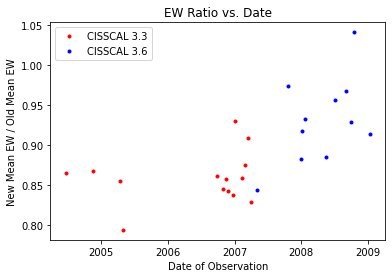

In [4]:
print('How much was EW affected by CISSCAL version?')
print('  Mean New/Old EW 3.3:', commondata33['EW Ratio'].mean())
print('  Mean New/Old EW 3.6:', commondata36['EW Ratio'].mean())
plt.plot(commondata33['Date'], commondata33['EW Ratio'], '.', 
         color='red', label='CISSCAL 3.3')
plt.plot(commondata36['Date'], commondata36['EW Ratio'], '.', 
         color='blue', label='CISSCAL 3.6')
plt.legend()
plt.xlabel('Date of Observation')
plt.ylabel('New Mean EW / Old Mean EW')
_=plt.title('EW Ratio vs. Date')

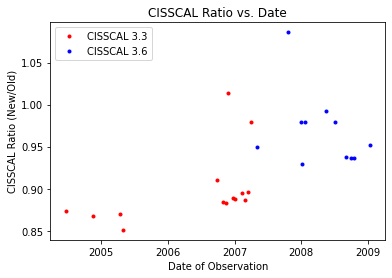

In [5]:
plt.plot(commondata33['Date'], commondata33['CISSCAL Ratio'], '.', 
         color='red', label='CISSCAL 3.3')
plt.plot(commondata36['Date'], commondata36['CISSCAL Ratio'], '.', 
         color='blue', label='CISSCAL 3.6')
plt.legend()
plt.xlabel('Date of Observation')
plt.ylabel('CISSCAL Ratio (New/Old)')
_=plt.title('CISSCAL Ratio vs. Date')

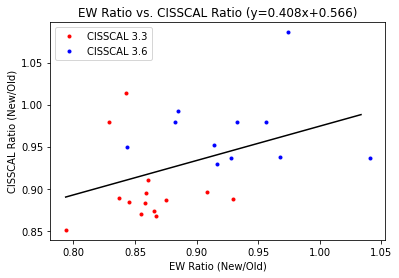

In [6]:
coeff = np.polyfit(commondata['EW Ratio'], commondata['CISSCAL Ratio'], 1)
ewr_min = commondata['EW Ratio'].min()
ewr_max = commondata['EW Ratio'].max()
plt.plot(commondata33['EW Ratio'], commondata33['CISSCAL Ratio'], '.', 
         color='red', label='CISSCAL 3.3')
plt.plot(commondata36['EW Ratio'], commondata36['CISSCAL Ratio'], '.', 
         color='blue', label='CISSCAL 3.6')
xrange = np.arange(ewr_min, ewr_max, 0.01)
plt.plot(xrange, np.polyval(coeff, xrange), '-',
         color='black')
plt.legend()
plt.xlabel('EW Ratio (New/Old)')
plt.ylabel('CISSCAL Ratio (New/Old)')
_=plt.title(f'EW Ratio vs. CISSCAL Ratio (y={coeff[0]:.3f}x+{coeff[1]:.3f})')

Mean CISSCAL-adjusted EW ratio: 0.9598265001800275
Mean CISSCAL 3.3-adjusted EW ratio: 0.9574542276140346
Mean CISSCAL 3.6-adjusted EW ratio: 0.9628457561731093


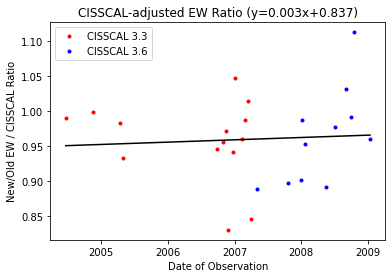

In [7]:
coeff = np.polyfit(commondata['Date_days'],
                   commondata['EW Ratio'] / commondata['CISSCAL Ratio'], 1)
date_min = commondata['Date_days'].min()
date_max = commondata['Date_days'].max()
plt.plot(commondata33['Date'], commondata33['EW Ratio'] / commondata33['CISSCAL Ratio'], '.',
         color='red', label='CISSCAL 3.3')
plt.plot(commondata36['Date'], commondata36['EW Ratio'] / commondata36['CISSCAL Ratio'], '.',
         color='blue', label='CISSCAL 3.6')
plt.plot([date_min,date_max], np.polyval(coeff, [date_min,date_max]), '-',
         color='black')
plt.legend()
plt.xlabel('Date of Observation')
plt.ylabel('New/Old EW / CISSCAL Ratio')
_=plt.title(f'CISSCAL-adjusted EW Ratio (y={coeff[0]*365.25:.3f}x+{coeff[1]:.3f})')
print('Mean CISSCAL-adjusted EW ratio:', 
      np.mean(commondata['EW Ratio'] / commondata['CISSCAL Ratio']))
print('Mean CISSCAL 3.3-adjusted EW ratio:', 
      np.mean(commondata33['EW Ratio'] / commondata33['CISSCAL Ratio']))
print('Mean CISSCAL 3.6-adjusted EW ratio:', 
      np.mean(commondata36['EW Ratio'] / commondata36['CISSCAL Ratio']))


# Compare Old/New EW with Phase Curves

### Use All Common Data Points

** Statistics - ratio of phase curves including outliers
Ratio min: 0.851203599834048
Ratio max: 0.9274173186387323
Ratio mean: 0.8842137107365238
Ratio median: 0.881733348544138


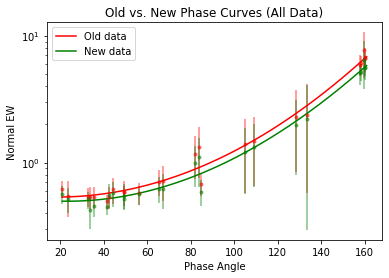

In [8]:
xrange = np.arange(commondata['Mean Phase'].min(), commondata['Mean Phase'].max()+1)
commondata['Normal EW_old'] = (commondata['EW_old'] * 
                               np.abs(np.cos(np.radians(commondata['Mean Emission']))))
commondata['Normal EW Std_old'] = (commondata['EW Std_old'] * 
                                   np.abs(np.cos(np.radians(commondata['Mean Emission']))))
plt.errorbar(commondata['Mean Phase'], commondata['Normal EW_old'], 
             yerr=commondata['Normal EW Std_old'], fmt='.', color='red', alpha=0.5)
plt.errorbar(commondata['Mean Phase'], commondata['Normal EW'], 
             yerr=commondata['Normal EW Std'], fmt='.', color='green', alpha=0.5)
# 2012 paper used log-cubic phase curve
coeff_old = np.polyfit(commondata['Mean Phase'], np.log10(commondata['Normal EW_old']), 3)
coeff_new = np.polyfit(commondata['Mean Phase'], np.log10(commondata['Normal EW']), 3)
phase_model_old = 10**np.polyval(coeff_old, xrange)
phase_model_new = 10**np.polyval(coeff_new, xrange)
plt.plot(xrange, phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('Old vs. New Phase Curves (All Data)')
phase_curve_ratio = phase_model_new / phase_model_old
print('** Statistics - ratio of phase curves including outliers')
print('Ratio min:', phase_curve_ratio.min())
print('Ratio max:', phase_curve_ratio.max())
print('Ratio mean:', phase_curve_ratio.mean())
print('Ratio median:', np.median(phase_curve_ratio))

** Statistics - ratio of CISSCAL-adjusted phase curves including outliers
Ratio min: 0.9237419018913272
Ratio max: 1.0261825411863297
Ratio mean: 0.9629278671344779
Ratio median: 0.9620374785123802


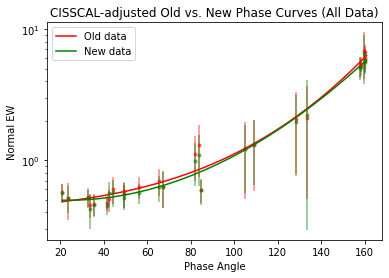

In [9]:
plt.errorbar(commondata['Mean Phase'], 
             commondata['Normal EW_old'] * commondata['CISSCAL Ratio'], 
             yerr=commondata['Normal EW Std_old'] * commondata['CISSCAL Ratio'], 
             fmt='.', color='red', alpha=0.5)
plt.errorbar(commondata['Mean Phase'], 
             commondata['Normal EW'], 
             yerr=commondata['Normal EW Std'], 
             fmt='.', color='green', alpha=0.5)
coeff_old = np.polyfit(commondata['Mean Phase'], 
                       np.log10(commondata['Normal EW_old'] * commondata['CISSCAL Ratio']), 3)
coeff_new = np.polyfit(commondata['Mean Phase'], 
                       np.log10(commondata['Normal EW']), 3)
phase_model_old = 10**np.polyval(coeff_old, xrange)
phase_model_new = 10**np.polyval(coeff_new, xrange)
plt.plot(xrange, phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('CISSCAL-adjusted Old vs. New Phase Curves (All Data)')
phase_curve_ratio = phase_model_new / phase_model_old
print('** Statistics - ratio of CISSCAL-adjusted phase curves including outliers')
print('Ratio min:', phase_curve_ratio.min())
print('Ratio max:', phase_curve_ratio.max())
print('Ratio mean:', phase_curve_ratio.mean())
print('Ratio median:', np.median(phase_curve_ratio))

In [10]:
ew_ratio = commondata['Normal EW'] / commondata['Normal EW_old']
print('** Statistics - ratio of data points including outliers')
print('Ratio min:', ew_ratio.min())
print('Ratio max:', ew_ratio.max())
print('Ratio mean:', ew_ratio.mean())
print('Ratio median:', ew_ratio.median())

** Statistics - ratio of data points including outliers
Ratio min: 0.793578288317905
Ratio max: 1.0415666417537668
Ratio mean: 0.8890307969040834
Ratio median: 0.872503898577839


### Exclude Outliers

In [11]:
limited_commondata = commondata[commondata.index != 'ISS_041RF_FMOVIE001_VIMS']
limited_commondata = limited_commondata[limited_commondata.index != 'ISS_044RF_FMOVIE001_VIMS']
limited_commondata = limited_commondata[limited_commondata.index != 'ISS_00ARI_SPKMOVPER001_PRIME']
print('Number of observation names after removing outliers:', len(limited_commondata))

Number of observation names after removing outliers: 22


** Statistics - ratio of phase curves excluding outliers
Ratio min: 0.8478665380088047
Ratio max: 0.9150956833896191
Ratio mean: 0.8955762213815205
Ratio median: 0.9029017433487315


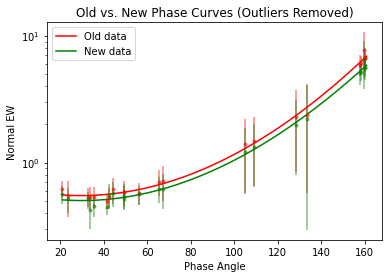

In [12]:
plt.errorbar(limited_commondata['Mean Phase'], limited_commondata['Normal EW_old'], 
             yerr=limited_commondata['Normal EW Std_old'], fmt='.', color='red', alpha=0.5)
plt.errorbar(limited_commondata['Mean Phase'], limited_commondata['Normal EW'], 
             yerr=limited_commondata['Normal EW Std'], fmt='.', color='green', alpha=0.5)
limited_coeff_old = np.polyfit(limited_commondata['Mean Phase'], 
                               np.log10(limited_commondata['Normal EW_old']), 3)
limited_coeff_new = np.polyfit(limited_commondata['Mean Phase'], 
                               np.log10(limited_commondata['Normal EW']), 3)
limited_phase_model_old = 10**np.polyval(limited_coeff_old, xrange)
limited_phase_model_new = 10**np.polyval(limited_coeff_new, xrange)
plt.plot(xrange, limited_phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, limited_phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('Old vs. New Phase Curves (Outliers Removed)')
limited_phase_curve_ratio = limited_phase_model_new / limited_phase_model_old
print('** Statistics - ratio of phase curves excluding outliers')
print('Ratio min:', limited_phase_curve_ratio.min())
print('Ratio max:', limited_phase_curve_ratio.max())
print('Ratio mean:', limited_phase_curve_ratio.mean())
print('Ratio median:', np.median(limited_phase_curve_ratio))


** Statistics - ratio of phase curves excluding outliers
Ratio min: 0.9203435891467849
Ratio max: 1.0127867517220965
Ratio mean: 0.9747473092501647
Ratio median: 0.9743059083507054


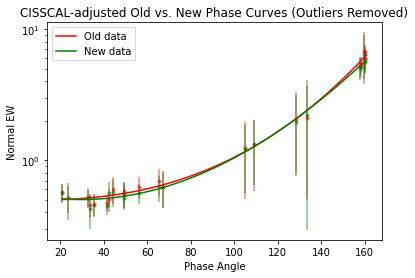

In [13]:
plt.errorbar(limited_commondata['Mean Phase'], 
             limited_commondata['Normal EW_old'] * limited_commondata['CISSCAL Ratio'], 
             yerr=limited_commondata['Normal EW Std_old'] *
                  limited_commondata['CISSCAL Ratio'], 
             fmt='.', color='red', alpha=0.5)
plt.errorbar(limited_commondata['Mean Phase'], 
             limited_commondata['Normal EW'], 
             yerr=limited_commondata['Normal EW Std'], 
             fmt='.', color='green', alpha=0.5)
limited_coeff_old = np.polyfit(limited_commondata['Mean Phase'], 
                               np.log10(limited_commondata['Normal EW_old'] * 
                                        limited_commondata['CISSCAL Ratio']), 3)
limited_coeff_new = np.polyfit(limited_commondata['Mean Phase'], 
                               np.log10(limited_commondata['Normal EW']), 3)
limited_phase_model_old = 10**np.polyval(limited_coeff_old, xrange)
limited_phase_model_new = 10**np.polyval(limited_coeff_new, xrange)
plt.plot(xrange, limited_phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, limited_phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('CISSCAL-adjusted Old vs. New Phase Curves (Outliers Removed)')
limited_phase_curve_ratio = limited_phase_model_new / limited_phase_model_old
print('** Statistics - ratio of phase curves excluding outliers')
print('Ratio min:', limited_phase_curve_ratio.min())
print('Ratio max:', limited_phase_curve_ratio.max())
print('Ratio mean:', limited_phase_curve_ratio.mean())
print('Ratio median:', np.median(limited_phase_curve_ratio))


# Look for EW Dependence on E or I near 90

### Use Common Data

Mean Normal EW low E/I: 0.5485388811681489
Mean Normal EW Other: 0.5716168300191752
Ratio: 1.0420716737560705


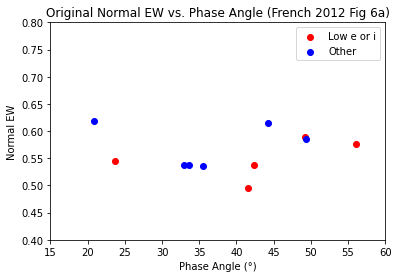

In [14]:
# Reproduce 2012 paper Fig 6a
# Look for dependence on e or i close to 90
low_e = np.abs(commondata['Mean Emission']-90) < 6
low_i = np.abs(commondata['Incidence']-90) < 6
low_ei = low_e | low_i
low_phase = commondata['Mean Phase'] <= 60
low_phase_commondata = commondata[low_phase]
mean_low = np.mean(low_phase_commondata['Normal EW_old'][low_ei])
mean_notlow = np.mean(low_phase_commondata['Normal EW_old'][~low_ei])
print('Mean Normal EW low E/I:', mean_low)
print('Mean Normal EW Other:', mean_notlow)
print('Ratio:', mean_notlow/mean_low)
plt.scatter(low_phase_commondata['Mean Phase'][low_ei], 
            low_phase_commondata['Normal EW_old'][low_ei], c='red', label='Low e or i')
plt.scatter(low_phase_commondata['Mean Phase'][~low_ei],
            low_phase_commondata['Normal EW_old'][~low_ei], c='blue', label='Other')
plt.legend()
plt.xlim(15,60)
plt.ylim(0.4,0.8)
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW')
_=plt.title('Original Normal EW vs. Phase Angle (French 2012 Fig 6a)')

Mean Normal EW low E/I: 0.526946
Mean Normal EW Other: 0.5088400000000001
Ratio: 0.9656397429717657


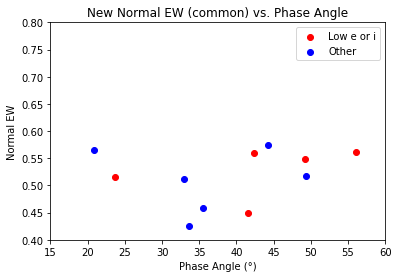

In [15]:
# Same figure but using new data
# Plot Normal EW for common new data for low phase angles and tag with
# low e or low i
low_e = np.abs(commondata['Mean Emission']-90) < 6
low_i = np.abs(commondata['Incidence']-90) < 6
low_ei = low_e | low_i
low_phase = commondata['Mean Phase'] <= 60
low_phase_commondata = commondata[low_phase]
mean_low = np.mean(low_phase_commondata['Normal EW'][low_ei])
mean_notlow = np.mean(low_phase_commondata['Normal EW'][~low_ei])
print('Mean Normal EW low E/I:', mean_low)
print('Mean Normal EW Other:', mean_notlow)
print('Ratio:', mean_notlow/mean_low)
plt.scatter(low_phase_commondata['Mean Phase'][low_ei], 
            low_phase_commondata['Normal EW'][low_ei], c='red', label='Low e or i')
plt.scatter(low_phase_commondata['Mean Phase'][~low_ei], 
            low_phase_commondata['Normal EW'][~low_ei], c='blue', label='Other')
plt.legend()
plt.xlim(15,60)
plt.ylim(0.4,0.8)
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW')
_=plt.title('New Normal EW (common) vs. Phase Angle')

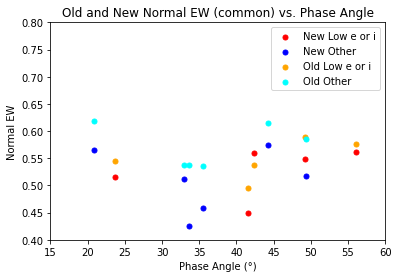

In [16]:
plt.scatter(low_phase_commondata['Mean Phase'][low_ei], 
            low_phase_commondata['Normal EW'][low_ei], marker='.', s=100, 
            c='red', label='New Low e or i')
plt.scatter(low_phase_commondata['Mean Phase'][~low_ei], 
            low_phase_commondata['Normal EW'][~low_ei], marker='.', s=100, 
            c='blue', label='New Other')
plt.scatter(low_phase_commondata['Mean Phase'][low_ei], 
            low_phase_commondata['Normal EW_old'][low_ei], marker='.', s=100, 
            c='orange', label='Old Low e or i')
plt.scatter(low_phase_commondata['Mean Phase'][~low_ei], 
            low_phase_commondata['Normal EW_old'][~low_ei], marker='.', s=100, 
            c='cyan', label='Old Other')
plt.legend()
plt.xlim(15,60)
plt.ylim(0.4,0.8)
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW')
_=plt.title('Old and New Normal EW (common) vs. Phase Angle')